TD : Analyse des Données Textuelles en Python pour le NLP

1 Exploration statistique

In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\SCD UM\\OneDrive\\Documents\\Cours M2 2024-2025\\S1\\De la donnée de santé à l'IA\\NLEMBA_Sephora_ESN_NLP\\Fichiers csv\\articles_spiderman.csv")
df.head()

,titre,description,texte_nettoye,mots,nombre_mots,url,auteur,source,date_publication
0,"Marvel Comics Spoilers in the Daily LITG, 18th...",Marvel Comics spoilers topped the traffic on B...,marvel comics spoilers in the daily litg 18th ...,marvel comics spoilers the daily litg 18th dec...,73,https://bleedingcool.com/comics/marvel-comics-...,Rich Johnston,Bleeding Cool News,2024-12-18T10:50:10Z
1,"Calm down everyone, Spider-Man: Beyond the Spi...",One of Spider-Man: Beyond the Spider-Verse's p...,calm down everyone spider man beyond the spide...,calm down everyone spider man beyond the spide...,66,https://www.techradar.com/streaming/entertainm...,tom.power@futurenet.com (Tom Power),TechRadar,2024-12-18T10:44:01Z
2,30 Unique Ways Christmas Is Celebrated Around ...,From uniquely American holiday activities to W...,30 unique ways christmas is celebrated around ...,unique ways christmas celebrated around the wo...,56,https://time.com/7202959/unique-christmas-holi...,Chad de Guzman,Time,2024-12-18T10:00:00Z
3,"The Pogues at 3Arena: Chaos, passion and relen...",A stacked line-up including members of Fontain...,the pogues at 3arena chaos passion and relentl...,the pogues 3arena chaos passion and relentless...,61,https://www.irishtimes.com/culture/music/revie...,Una Mullally,The Irish Times,2024-12-18T10:00:00Z
4,Irish Data Protection Commission (DPC) fined M...,Meta has been fined €251M ($263M) for a 2018 d...,irish data protection commission dpc fined met...,irish data protection commission dpc fined met...,79,https://securityaffairs.com/172100/laws-and-re...,Pierluigi Paganini,Securityaffairs.com,2024-12-18T09:18:19Z


In [3]:
# Extraire les données de la colonne nettoyée 
clean_data = df['texte_nettoye']

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


2 Visualisation

3 Analyse de sentiments


texte_nettoye
<class 'str'>    100
Name: count, dtype: int64


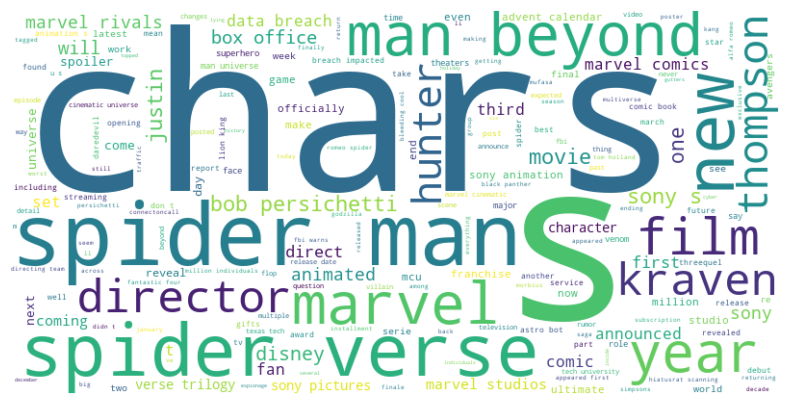

                                       texte_nettoye  sentiment  subjectivity
0  marvel comics spoilers in the daily litg 18th ...   0.255556      0.427778
1  calm down everyone spider man beyond the spide...  -0.013611      0.475278
2  30 unique ways christmas is celebrated around ...   0.216667      0.483333
3  the pogues at 3arena chaos passion and relentl...   0.242857      0.728571
4  irish data protection commission dpc fined met...   0.000000      0.000000


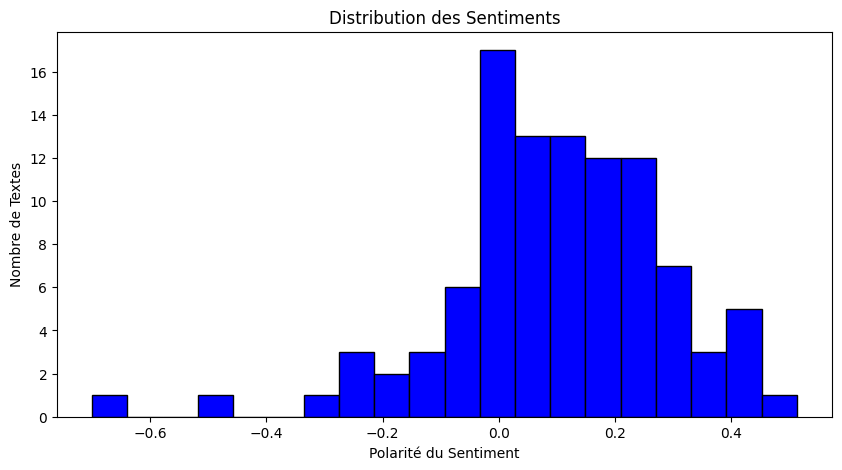

Exemple 74:
Texte: nan
Sentiment: 0.0
Subjectivité: 0.0
--------------------------------------------------------------------------------
Exemple 59:
Texte: marvel rivals confusing use of the term ace explained marvel rivals is the latest game to make a splash in the hero shooter scene and it s easy to see where it takes its inspiration from that s not to say the developers didn t put enough of a unique spin on things team up abilities for example are a special marvel rivals is the latest game to make a splash in the hero shooter scene and its easy to see where it takes its inspiration from thats not to say the developers didnt put enough of a unique spin 3216 chars
Sentiment: 0.15615079365079368
Subjectivité: 0.6865079365079364
--------------------------------------------------------------------------------
Exemple 15:
Texte: marvel toho announce godzilla vs fantastic four crossover comic 1st of 6 one shots ships on march 19 to set stage for next summer s godzilla and marvel limited se

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Charger le fichier CSV
file_path = "C:\\Users\\SCD UM\\OneDrive\\Documents\\Cours M2 2024-2025\\S1\\De la donnée de santé à l'IA\\NLEMBA_Sephora_ESN_NLP\\Fichiers csv\\articles_spiderman.csv"
df = pd.read_csv(file_path)

# Extraire les données nettoyées d'une colonne spécifique (par exemple, la colonne 'texte_nettoye') et gérer les valeurs manquantes
clean_data = df['texte_nettoye'].fillna('').astype(str)

# Vérifier le type des données pour s'assurer que toutes les valeurs sont des chaînes de caractères
print(clean_data.apply(type).value_counts())

# Générer le nuage de mots
text = ' '.join(clean_data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Fonction pour analyser les sentiments
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Appliquer l'analyse des sentiments sur les données nettoyées
df['sentiment'] = clean_data.apply(lambda x: analyze_sentiment(x)[0])
df['subjectivity'] = clean_data.apply(lambda x: analyze_sentiment(x)[1])

# Afficher un échantillon des résultats
print(df[['texte_nettoye', 'sentiment', 'subjectivity']].head())

# Visualiser la répartition des sentiments
plt.figure(figsize=(10, 5))
plt.hist(df['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution des Sentiments')
plt.xlabel('Polarité du Sentiment')
plt.ylabel('Nombre de Textes')
plt.show()

# Comparer les résultats avec des exemples concrets
examples = df.sample(5)  # Sélectionner 5 exemples aléatoires
for index, row in examples.iterrows():
    print(f"Exemple {index}:")
    print(f"Texte: {row['texte_nettoye']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Subjectivité: {row['subjectivity']}")
    print("-" * 80)
